In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malicious-urls-dataset/malicious_phish.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# read data

In [3]:
df=pd.read_csv("/kaggle/input/malicious-urls-dataset/malicious_phish.csv")
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


# data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [6]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [7]:
df.duplicated().sum()

10066

In [10]:
df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(641125, 2)

In [14]:
df.describe()

,url,type
count,641125,641125
unique,641119,4
top,en.wikipedia.org/wiki/Desktop_publishing,benign
freq,2,428080


In [15]:
df['url'].value_counts()

url
en.wikipedia.org/wiki/Desktop_publishing                        2
memory.loc.gov/ammem/ccmphtml/colahome.html                     2
ebookstore.sony.com/reader/                                     2
routesinternational.com/air.htm                                 2
en.wikipedia.org/wiki/E-book                                    2
                                                               ..
rockstarsalestraining.com/                                      1
harmonhomes.com/real-estate/foreclosure/Idaho/county/Payette    1
lawyers.justia.com/lawyers/people/Z0211.html                    1
dccil.org                                                       1
www.angelfire.com/goth/devilmaycrytonite/                       1
Name: count, Length: 641119, dtype: int64

In [19]:
df = df.rename(columns={"type": "label"})

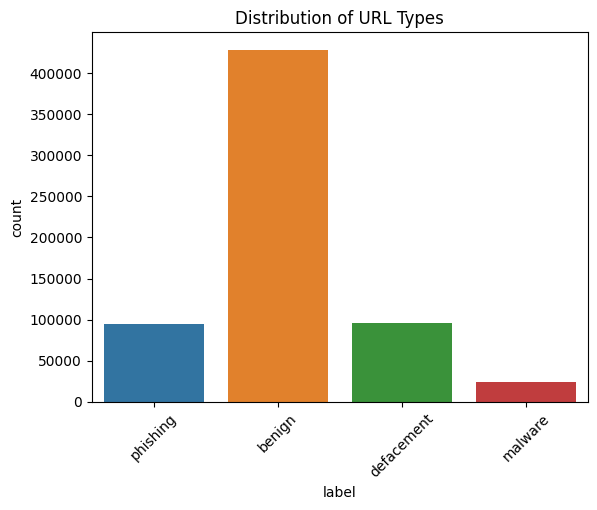

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Distribution of URL Types")
plt.xticks(rotation=45)
plt.show()

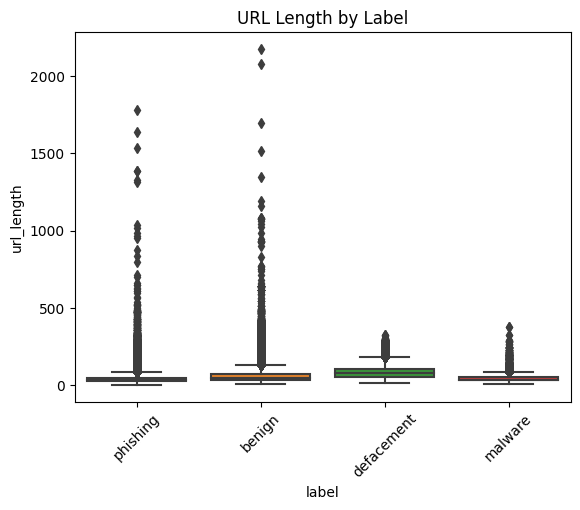

In [21]:
df['url_length'] = df['url'].apply(len)

sns.boxplot(x='label', y='url_length', data=df)
plt.title("URL Length by Label")
plt.xticks(rotation=45)
plt.show()

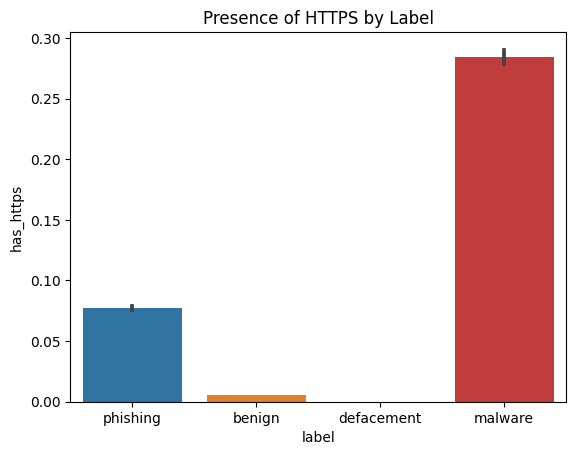

In [24]:
sns.barplot(x='label', y='has_https', data=df)
plt.title("Presence of HTTPS by Label")
plt.show()

**important features**

In [26]:
df = df[['url', 'label']]

# convert classifications into safe or not safe

In [27]:
df['label'] = df['label'].apply(lambda x: 'safe' if x == 'benign' else 'not_safe')

# Feature Extraction

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['url'])

# Target

In [35]:
y = df['label']

# splitting data

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train model

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

# Accuracy

In [38]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8959719243517255
              precision    recall  f1-score   support

    not_safe       0.89      0.78      0.83     42721
        safe       0.90      0.95      0.92     85504

    accuracy                           0.90    128225
   macro avg       0.89      0.87      0.88    128225
weighted avg       0.90      0.90      0.89    128225



In [39]:
def check_url(url):
    vector = vectorizer.transform([url])
    prediction = model.predict(vector)[0]
    return prediction

print(check_url("http://mybank-login-security.com"))


safe


# save model

In [40]:
import joblib

joblib.dump(model, "url_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']